[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/regression.ipynb)

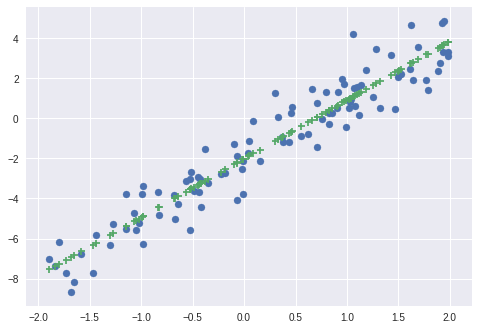

In [0]:
#線形単回帰
from matplotlib import pyplot as plt
import numpy as np

x = np.random.rand(100, 1)
x = x * 4 - 2
y = 3 * x - 2
y += np.random.randn(100, 1)

#最小二乗法
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x, y)

plt.scatter(x, y, marker='o')
plt.scatter(x, model.predict(x), marker='+')
plt.show()


In [0]:
print(model.coef_)
print(model.intercept_)

[[2.93106683]]
[-1.99909593]


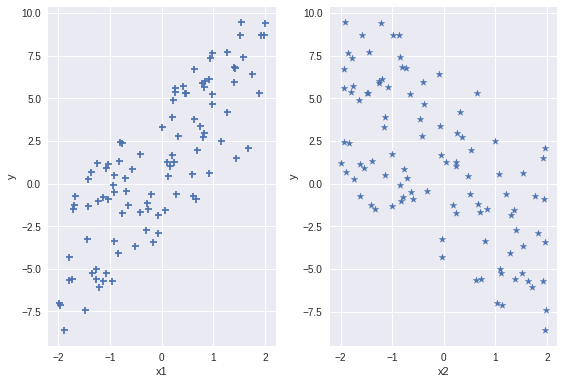

In [0]:
#重回帰
from matplotlib import pyplot as plt
import numpy as np

x1 = np.random.rand(100, 1)
x1 = x1 * 4 - 2
x2 = np.random.rand(100, 1)
x2 = x2 * 4 - 2
y = 3 * x1 - 2 * x2 + 1

plt.subplot(1,2,1)
plt.scatter(x1, y, marker='+')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(x2, y, marker='*')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

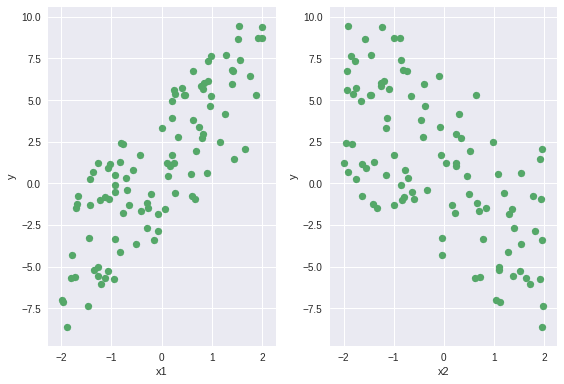

In [0]:
#最小二乗法
from sklearn import linear_model

x1_x2 = np.c_[x1,x2]

model = linear_model.LinearRegression()
model.fit(x1_x2, y)

y_ = model.predict(x1_x2)

plt.subplot(1,2,1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(x2, y, marker='+')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

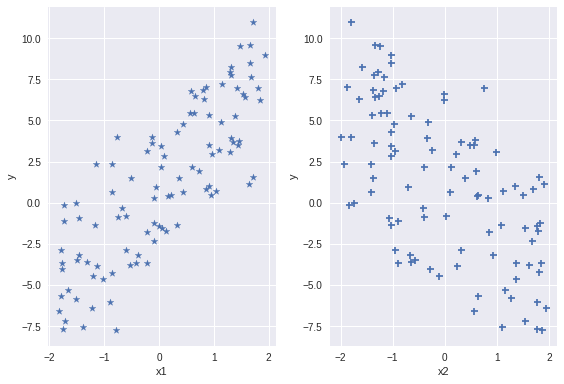

In [0]:
#random
from matplotlib import pyplot as plt
import numpy as np

x1 = np.random.rand(100,1)
x1 = x1 * 4 - 2

x2 = np.random.rand(100,1)
x2 = x2 * 4 - 2

y = 3 * x1 - 2 * x2 + 1
y += np.random.randn(100,1)

plt.subplot(1,2,1)
plt.scatter(x1, y, marker='*')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(x2, y, marker='+')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

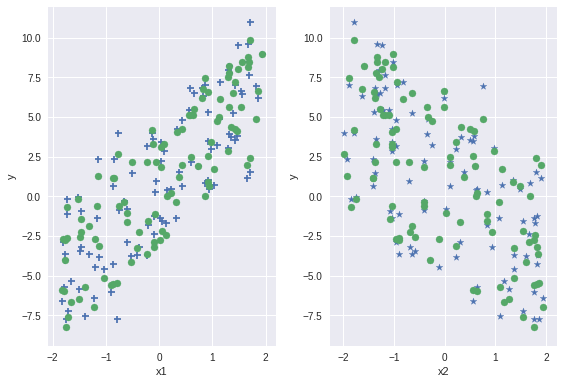

In [0]:
#LinearRegression
from sklearn import linear_model

x1_x2 = np.c_[x1, x2]

model = linear_model.LinearRegression()
model.fit(x1_x2, y)

y_ = model.predict(x1_x2)

plt.subplot(1,2,1)
plt.scatter(x1, y, marker='+')
plt.scatter(x1, y_, marker='o')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(x2, y, marker='*')
plt.scatter(x2, y_, marker='o')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [0]:
print(model.coef_)
print(model.intercept_)
print(model.score(x1_x2, y))

[[ 3.08837553 -2.06980714]]
[0.86364943]
0.9597420537975537


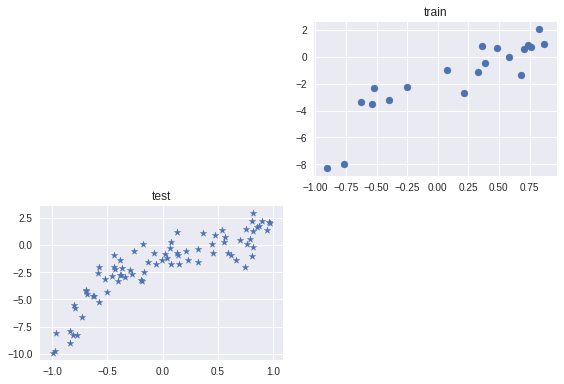

In [0]:
#過学習
from matplotlib import pyplot as plt
import numpy as np

x = np.random.rand(100, 1)
x = x * 2 - 1
y = 4 * x ** 3 - 3 * x ** 2 + 2 * x - 1
y += np.random.randn(100, 1)

x_train = x[:20]
y_train = y[:20]

x_test = x[20:]
y_test = y[20:]

plt.subplot(1,2,1)
plt.scatter(x, y, marker='+')
plt.title('all')

plt.subplot(2,2,2)
plt.scatter(x_train, y_train, marker='o')
plt.title('train')

plt.subplot(2,2,3)
plt.scatter(x_test, y_test, marker='*')
plt.title('test')

plt.tight_layout()
plt.show()

[[-812.87624206  110.63213558 1372.91733487 -173.45762104 -757.0428578
    74.07512219  156.98824517   -9.81267074   -6.57269203]]
[-1.32630881]
0.9586738136903655


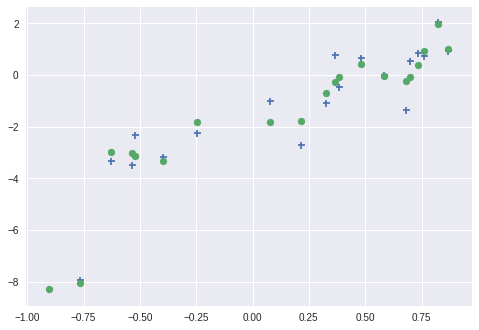

In [0]:
from sklearn import linear_model

X_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6, x_train**5, x_train**4, x_train**3, x_train**2, x_train]

model = linear_model.LinearRegression()
model.fit(X_TRAIN, y_train)

print(model.coef_)
print(model.intercept_)
print(model.score(X_TRAIN, y_train))

plt.scatter(x_train, y_train, marker ='+')
plt.scatter(x_train, model.predict(X_TRAIN))
plt.show()

-8.070359509943156


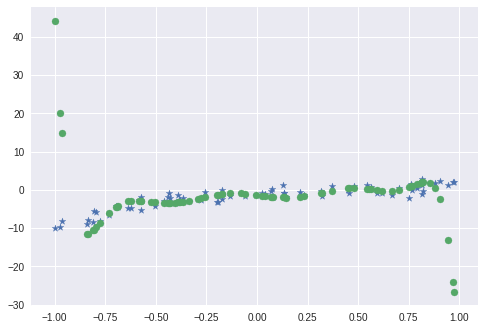

In [0]:
X_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5, x_test**4, x_test**3, x_test**2, x_test]

print(model.score(X_TEST, y_test))
plt.scatter(x_test, y_test, marker='*')
plt.scatter(x_test, model.predict(X_TEST))
plt.show()

[ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.          1.16245685]
[-1.7249139]
0.3773710395493056


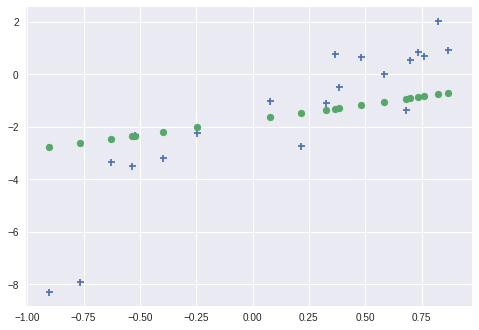

In [0]:
#model lasso
from sklearn import linear_model

model = linear_model.Lasso()
model.fit(X_TRAIN, y_train)

print(model.coef_)
print(model.intercept_)
print(model.score(X_TRAIN, y_train))

plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN))
plt.show()

[[ 0.53823621 -0.38008431  0.77358889 -0.53398737  1.11226607 -0.71416503
   1.61360558 -0.7259996   2.42315763]]
[-1.6102903]
0.8726812060355231


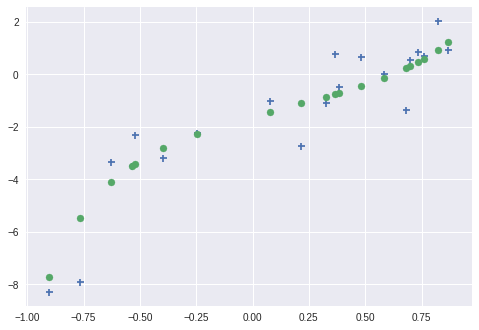

In [0]:
#model ridge
from sklearn import linear_model

model = linear_model.Ridge()
model.fit(X_TRAIN, y_train)

print(model.coef_)
print(model.intercept_)
print(model.score(X_TRAIN, y_train))

plt.scatter(x_train, y_train, marker='+')
plt.scatter(x_train, model.predict(X_TRAIN))
plt.show()

0.8561016286104404


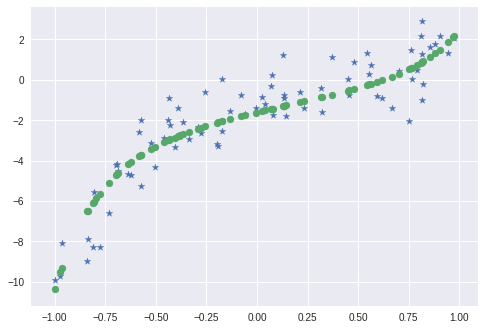

In [0]:
print(model.score(X_TEST, y_test))
plt.scatter(x_test, y_test, marker='*')
plt.scatter(x_test, model.predict(X_TEST))
plt.show()

0.02189806273063888


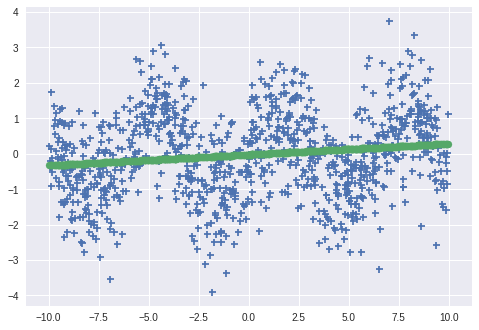

In [11]:
import math
import numpy as np
from matplotlib import pyplot as plt

x = np.random.rand(1000, 1)
x = x * 20 - 10

y = np.array([math.sin(v) for v in x])
y += np.random.randn(1000)

from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x, y)

print(model.score(x, y))

plt.scatter(x, y, marker ='+')
plt.scatter(x, model.predict(x), marker='o')
plt.show()
